## Predict Future Sales for 1C - EDA

This challenge serves as final project for the "How to win a data science competition" Coursera course.

In this competition I will work with a time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company, and predict total sales for every product and store in the _next month_.

In this notebook we will focus on exploratory data analysis of the sales data from Jan 2013 to Oct 2013 in test and November 2015 test set. We will also try out some sample submissions to get the baseline performance.

In [1]:
# Load required libraries
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

### File descriptions
* sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
* test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
* sample_submission.csv - a sample submission file in the correct format.
* items.csv - supplemental information about the items/products.
* item_categories.csv  - supplemental information about the items categories.
* shops.csv- supplemental information about the shops.

In [2]:
# Input data files to predict sales are in input folder. List the contents of input folder.
print (os.listdir("../input"))

['sales_train.csv', 'shops.csv', 'test.csv', 'item_categories.csv', 'items.csv', 'sample_submission.csv']


In [3]:
items=pd.read_csv('../input/items.csv')
item_categories=pd.read_csv('../input/item_categories.csv')
shops=pd.read_csv('../input/shops.csv')
test=pd.read_csv('../input/test.csv')
sample_submission=pd.read_csv('../input/sample_submission.csv')
sales_train=pd.read_csv('../input/sales_train.csv')

### Items data exploration

In [4]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [5]:
items.describe()

item_id  item_category_id
count  22170.00000      22170.000000
mean   11084.50000         46.290753
std     6400.07207         15.941486
min        0.00000          0.000000
25%     5542.25000         37.000000
50%    11084.50000         40.000000
75%    16626.75000         58.000000
max    22169.00000         83.000000

In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


Items data analysis
* 22,170 different items
* item_id - Each item has a unique id 
* item_category_id - Each items has a unique identifier of category.
* item_name - Each item has a name

### Item Categories data exploration

In [7]:
item_categories.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [8]:
item_categories.describe()

item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000

In [9]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


Item category data exploration details
* 84 different item categories
* item_category_id - Each category has a unique id starting at 0
* item_category_name - Each category has a name 

### Shops data exploration 

In [10]:
shops.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

In [11]:
shops.describe()

shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000

In [12]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


Shops data analysis shows the following
* 60 different shops
* shop_id - Each shop has a unique id starting at 0
* shop_name - Each shop has a name that is probably address or location of the shop (further exploration needed)

### Test data exploration
Description of the problem - "We are asking you to predict total sales for every product and store in the next month" Next month here is November 2015. 

In [13]:
test.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [14]:
test.describe()

ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.000000
75%    160649.250000      47.000000   16071.500000
max    214199.000000      59.000000   22167.000000

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


Test data analysis
* There are 214,200 items in test data
* We will have to predict sales for 60 shops for items sold
* There are only certain items each shop sells. If all items were sold in all the shops we probably would have 60*22167 predictions.

### Sample Submission data exploration

In [16]:
sample_submission.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [17]:
sample_submission.describe()

ID  item_cnt_month
count  214200.000000        214200.0
mean   107099.500000             0.5
std     61834.358168             0.0
min         0.000000             0.5
25%     53549.750000             0.5
50%    107099.500000             0.5
75%    160649.250000             0.5
max    214199.000000             0.5

In [18]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
ID                214200 non-null int64
item_cnt_month    214200 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


We will have to deliver item_cnt_month from test set. This is items sold in a specific shop in the "next month" which is November 2015.

### Sales Train data exploration

In [19]:
sales_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [20]:
sales_train.describe()

date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03

In [21]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


Training data set analysis shows 
* We have ~2.94 million transations 
* Transactions are from 60 shops in 33 months starting from Jan 1, 2013 to October 2015
* Data set has no NaNs
* We can calculate total sales per shop per item daily
* We can also calculate Revenue of a shop for a given item daily 
* Revenue = item_price * item_cnt_day

In [22]:
transactions = sales_train

In [23]:
sales_train['day'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y').dt.day
sales_train['month'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y').dt.month
sales_train['year'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y').dt.year
sales_train['weekday'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y').dt.dayofweek
sales_train.columns


Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'weekday'],
      dtype='object')

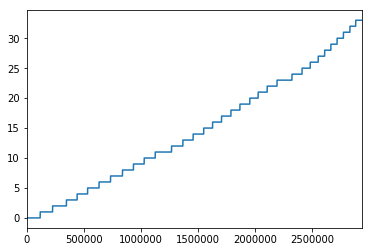

In [24]:
sales_train.date_block_num.plot()

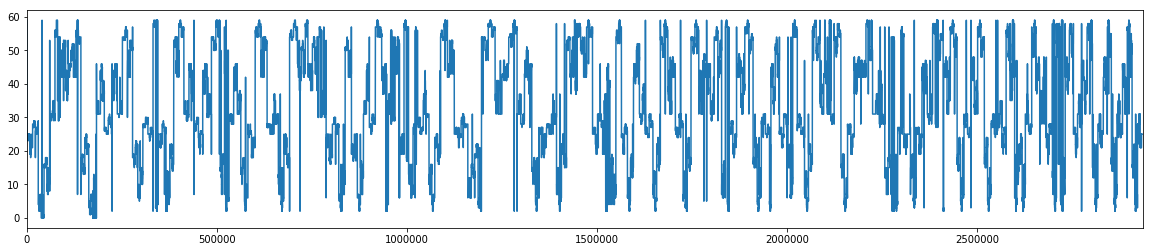

In [25]:
sales_train.shop_id.plot(figsize=(20,4))

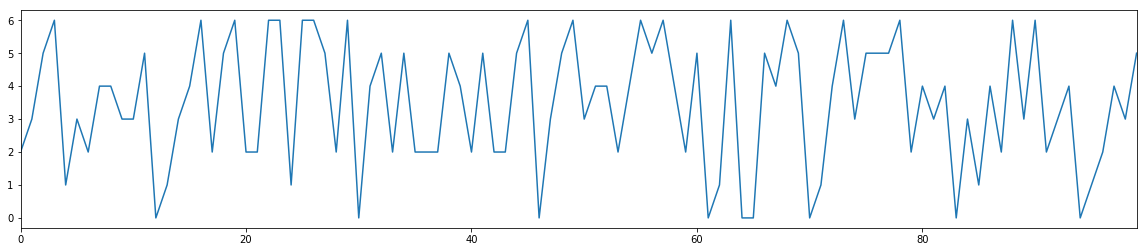

In [26]:
sales_train.weekday[0:100].plot(figsize=(20,4))

In [27]:
# Add category ID to our sales transactions
sales_train=sales_train.merge(items, how='left')
sales_train=sales_train.merge(item_categories,how="left")
sales_train=sales_train.merge(shops,how="left")
sales_train.head(2)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  03.01.2013               0       25     2552       899.0           1.0   

   day  month  year  weekday                                 item_name  \
0    2      1  2013        2                         ЯВЛЕНИЕ 2012 (BD)   
1    3      1  2013        3  DEEP PURPLE  The House Of Blue Light  LP   

   item_category_id item_category_name               shop_name  
0                37     Кино - Blu-Ray  Ярославль ТЦ "Альтаир"  
1                58     Музыка - Винил     Москва ТРК "Атриум"

In [28]:
sales_train.drop("item_name",axis=1,inplace=True)
sales_train.drop("shop_name",axis=1,inplace=True)
sales_train.drop("item_category_name",axis=1,inplace=True)
sales_train.head(2)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  03.01.2013               0       25     2552       899.0           1.0   

   day  month  year  weekday  item_category_id  
0    2      1  2013        2                37  
1    3      1  2013        3                58

In [29]:
sales_train.isnull().values.any()

False

In [30]:
# Add revenue to sales transactions.
sales_train["revenue"]=sales_train.item_cnt_day * sales_train.item_price
sales_train.head(2)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  03.01.2013               0       25     2552       899.0           1.0   

   day  month  year  weekday  item_category_id  revenue  
0    2      1  2013        2                37    999.0  
1    3      1  2013        3                58    899.0

In [31]:
# Sales per year, 2015 has only 10 months of data.
sales_train.groupby("year").sum()

date_block_num   shop_id      item_id    item_price  item_cnt_day  \
year                                                                      
2013         6999357  41342202  12906195991  9.212613e+08     1562733.0   
2014        18586791  35392138  10658165504  1.043554e+09     1320889.0   
2015        17188912  20153751   6373157363  6.505952e+08      764584.0   

           day    month  weekday  item_category_id       revenue  
year                                                              
2013  20179188  8266919  4286008          50321219  1.217525e+09  
2014  16880467  6972320  3550650          41839023  1.346778e+09  
2015   9481382  3103114  2044489          25277778  8.346231e+08

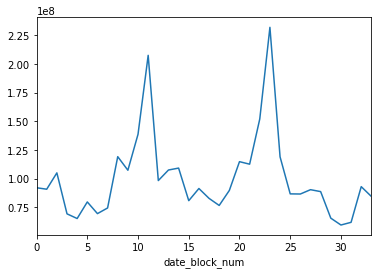

In [32]:
# Check if we see any sales seasonality
sales_train.groupby("date_block_num").sum()["revenue"].plot()
# We see spikes around Holiday period in December

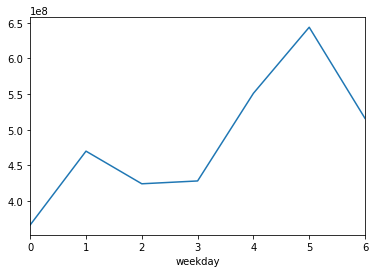

In [33]:
sales_train.groupby("weekday").sum()["revenue"].plot()
# Weekends are busiest for sales

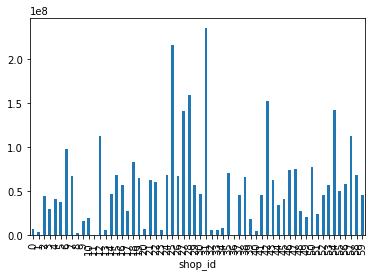

In [34]:
sales_train.groupby("shop_id").sum()["revenue"].plot.bar()
# Some stores are doing far better than the rest.

In [35]:
sales_train.groupby("shop_id").sum()["revenue"]


shop_id
0     6.637370e+06
1     3.238207e+06
2     4.404964e+07
3     3.014085e+07
4     4.053965e+07
5     3.816043e+07
6     9.806745e+07
7     6.695766e+07
8     2.349358e+06
9     1.637284e+07
10    1.941028e+07
11    5.216551e+05
12    1.122051e+08
13    6.006173e+06
14    4.673728e+07
15    6.871037e+07
16    5.743649e+07
17    2.778495e+07
18    8.339270e+07
19    6.495392e+07
20    6.599924e+06
21    6.258139e+07
22    6.043889e+07
23    5.621521e+06
24    6.881169e+07
25    2.164806e+08
26    6.755109e+07
27    1.406325e+08
28    1.597463e+08
29    5.655014e+07
30    4.670246e+07
31    2.352170e+08
32    5.772824e+06
33    5.949102e+06
34    8.582822e+06
35    7.020477e+07
36    3.777140e+05
37    4.597469e+07
38    6.576643e+07
39    1.809289e+07
40    4.293587e+06
41    4.609299e+07
42    1.519170e+08
43    6.221770e+07
44    3.420403e+07
45    4.092480e+07
46    7.418932e+07
47    7.488210e+07
48    2.771411e+07
49    2.014092e+07
50    7.795060e+07
51    2.420516e+07
52  

In [36]:
sales_train.groupby(["shop_id","date_block_num"]).sum()
# Some shops revenue are lower because of the time they operate.

item_id    item_price  item_cnt_day    day  month  \
shop_id date_block_num                                                       
0       0               50791835  2.546339e+06        5578.0  78996   4793   
        1               54019826  3.007530e+06        6127.0  74957  10128   
1       0               28789014  1.378736e+06        2947.0  44854   2694   
        1               32161359  1.547425e+06        3364.0  45276   5968   
2       0               10025040  1.028861e+06        1146.0  12133   1071   
        1                3676220  4.823465e+05         488.0   8245    908   
        2                5506859  6.463942e+05         753.0  10552   2043   
        3                4407754  5.961960e+05         583.0   8259   2224   
        4                4331370  5.186251e+05         553.0   8329   2655   
        5                6748971  7.127570e+05         832.0  11557   4500   
        6                6708194  8.405541e+05         807.0  11609   5376   
        7                6233189  8.416586e+05         875.0  13458   6336   
        8                5731637  9.337197e+05         945.0  11219   6615   
        9                5055479  8.620419e+05         795.0  10272   6340   
        10               5154101  8.833553e+05         862.0  10220   7194   
        11               9330357  2.011789e+06        1322.0  22861  13956   
        12               6637976  1.002970e+06         890.0  11431    830   
        13               5881222  1.110600e+06         911.0  11072   1564   
        14               6605873  1.365037e+06         990.0  13278   2490   
        15               5917481  9.868352e+05         791.0  11026   2872   
        16               5693507  9.865805e+05         910.0  12854   3565   
        17               6753715  1.111494e+06         957.0  11828   4788   
        18               5917944  9.319004e+05         838.0  10770   4837   
        19               6864178  1.020093e+06         956.0  13268   6304   
        20               6206626  1.105799e+06         920.0  11775   6381   
        21               6843819  1.229502e+06         945.0  12128   7830   
        22               7006538  1.434123e+06        1192.0  13996   9427   
        23              13134305  2.704724e+06        1921.0  29982  18300   
        24               7667512  1.329241e+06         987.0  11509    871   
        25               7461221  8.400967e+05         907.0  11902   1532   
...                          ...           ...           ...    ...    ...   
59      4               11996482  7.731048e+05        1374.0  18448   5970   
        5               14588031  9.946186e+05        1707.0  22358   8790   
        6               16228367  1.006289e+06        1747.0  26727  11193   
        7               17831226  1.092577e+06        2048.0  29999  14640   
        8               15673286  1.153747e+06        2008.0  24255  14220   
        9               14800921  1.123973e+06        1751.0  22885  14610   
        10              15658956  1.232056e+06        1953.0  22998  16973   
        11              19602366  1.955512e+06        2390.0  39904  24516   
        12              13549921  1.107389e+06        1491.0  19539   1392   
        13              11374996  1.135753e+06        1420.0  18250   2504   
        14              12642682  1.173572e+06        1467.0  20342   3825   
        15              10843719  8.438605e+05        1228.0  16794   4200   
        16              10401223  9.149936e+05        1184.0  17285   5245   
        17               9812491  9.790544e+05        1157.0  15936   6078   
        18               9577620  8.024118e+05        1082.0  15466   6818   
        19              11275390  1.124188e+06        1244.0  19158   9016   
        20               9267912  1.144300e+06        1161.0  15522   8469   
        21              10371122  1.230701e+06        1211.0  16176  10390   
        22              12259809  1.691086e+06 

In [37]:
shop_span=pd.DataFrame(columns=["shop_id","Start", "End"])
shop_span["shop_id"]=np.arange(60)
shop_span["Start"]=sales_train.groupby("shop_id")["date_block_num"].min()
shop_span["End"]=sales_train.groupby("shop_id")["date_block_num"].max()
#print(shop_span) We see shops that operate for a short time and shops 39 and 40 seem to be the same. Need to see if these shops exist in test data


In [38]:
test_shops=list(test.shop_id.unique())
#print(test_shops)
all_shops=list(range(60))
shops_not_in_test=[x for x in all_shops if x not in test_shops]
print(shops_not_in_test)
#print(shop_span[shop_span["End"]<33])

[0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]


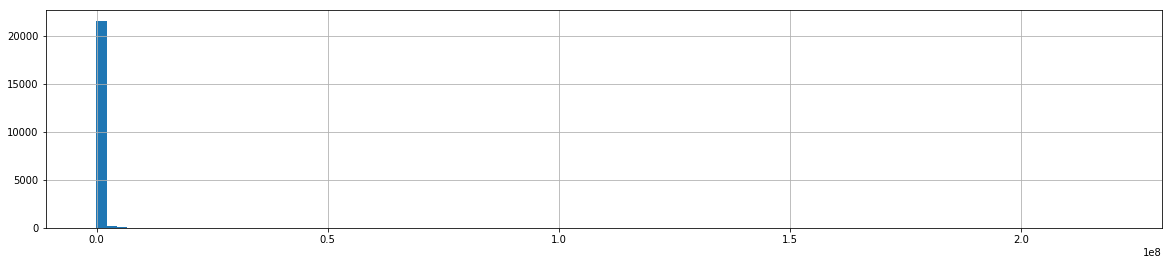

In [39]:
sales_train.groupby("item_id").sum()["revenue"].hist(figsize=(20,4),bins=100)


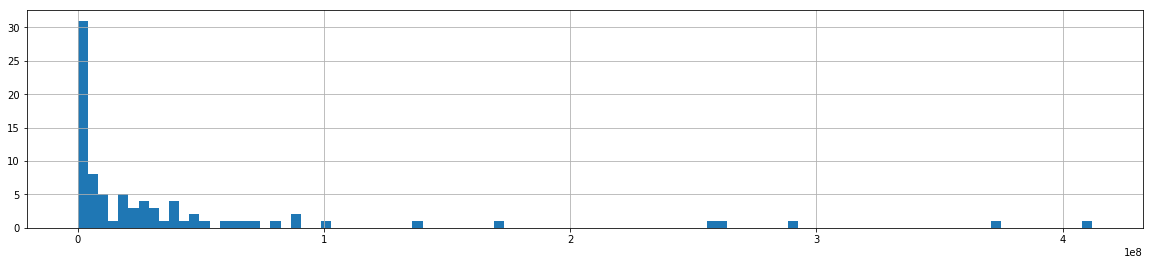

In [40]:
sales_train.groupby("item_category_id").sum()["revenue"].hist(figsize=(20,4),bins=100)


In [41]:
print(sales_train[sales_train.date_block_num==33]["item_id"].nunique())
print(sales_train.item_id.nunique())
# How many items are sold in Oct 2015 in train

5413
21807


In [42]:
sales_train.groupby(["item_id","item_price"]).sum()
# How does price change for items. Item id 22164 has changed significantly.

date_block_num  shop_id  item_cnt_day    day  month  \
item_id item_price                                                        
0       58.00                   20       54           1.0      1      9   
1       4490.00                108      330           6.0     47     42   
2       58.00                   41      108           2.0     36     19   
3       58.00                   19       54           1.0     26      8   
        100.00                  18       54           1.0      5      7   
4       58.00                   20       54           1.0     19      9   
5       28.00                   23       54           1.0     14     12   
6       100.00                  18       54           1.0     19      7   
7       28.00                   23       54           1.0     14     12   
8       58.00                   39      108           2.0     27     17   
9       58.00                   19       54           1.0      7      8   
10      28.00                   24       54           1.0     17      1   
11      58.00                   22       54           1.0     22     11   
12      189.00                   1       54           1.0      2      2   
13      58.00                   20       54           1.0      1      9   
14      28.00                   23       54           1.0     15     12   
15      58.00                   22       54           1.0     12     11   
16      58.00                   20       56           1.0     13      9   
17      98.00                   20       44           1.0     22      9   
18      58.00                   19       25           1.0     18      8   
19      28.00                    0       25           1.0     12      1   
20      58.00                   19       54           1.0     18      8   
21      58.00                   20       54           1.0     19      9   
22      28.00                   27       54           1.0      5      4   
23      28.00                   25       54           1.0     27      2   
24      98.00                   27       54           1.0      5      4   
25      58.00                   19       54           1.0     29      8   
26      58.00                   21       31           1.0     16     10   
27      498.00                  67       17           4.0     64     23   
        838.00                  27       57           3.0     40     30   
...                            ...      ...           ...    ...    ...   
22162   379.05                  26       35           1.0     20      3   
        399.00               10121    14297         519.0   6309   1036   
22163   90.23                   66       20           2.0     57     20   
        91.03                   31       51           1.0     15      8   
        98.00                   31       10           1.0     13      8   
        169.00                2143     2200          71.0   1052    602   
22164   379.62                  50      102           2.0     47      4   
        411.54                  26       10           1.0      2      3   
        475.00                  80      113           3.0     30     11   
        549.00                1062      942          33.0    571    303   
        674.00                 751      818          36.0    362     61   
        699.00                1844     2131          67.0    987    372   
        711.50                 225      294          18.0    107     18   
        711.55                  76      105           3.0     42      7   
        724.00                  75      120           9.0     43      6   
        748.60                  25        6           1.0     11      2   
        749.00                6585     8551         320.0   4076    628   
22165   59.00                   23      110           2.0     44     13   
22166   150.00                5042    14850         348.0   4265   1868   
22167   155.00                 150      124           8.0    120     62   
        239.20                  49       66  

#### Week2 tip 

"A good exercise is to reproduce previous_value_benchmark. As the name suggest - in this benchmark for each shop/item pair our predictions are just monthly sales from the previous month, i.e. October 2015.

The most important step at reproducing this score is correctly aggregating daily data and constructing monthly sales data frame. You need to get lagged values, fill NaNs with zeros and clip the values into [0,20] range. If you do it correctly, you'll get precisely 1.16777 on the public leaderboard.

Generating features like this is a necessary basis for more complex models. Also, if you decide to fit some model, don't forget to clip the target into [0,20] range, it makes a big difference."

In [43]:
salesclip= sales_train[sales_train["date_block_num"]==33].groupby(["shop_id", "item_id"],as_index=False).sum()[["shop_id","item_id","item_cnt_day"]]

salesclip["item_cnt_day"].clip(0,20,inplace=True)
#salesclip  #31531 rows × 3 columns

We are done exploring the data. Some of the things we analyzed are
* Differences per shop in items and categories
* Differences of items in terms of price changes, and amount sold
* Some stores had sales that was greater than most. Could be in major metros or even e-commerce stores
* We saw a strong seasonality factor in play. Holiday sales had a huge spike.
* Weekends saw a strong spike in sales
* Items went out of sale while others had pattern of increasing sales.
* Studied periods for which shops stayed open, several had a very short life.
* Studied shops that were in train that were not in test set.
* Many products not sold anymore

Ready to start feature engineering and then modelling
